### Imports

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
pd.set_option('display.max_rows', 3000)

#### Read the csv file

In [3]:
df = pd.read_csv('tell_all_corrected.csv')

In [4]:
df.shape

(1280927, 12)

In [5]:
df.columns

Index(['member_name', 'sitting_date', 'parliamentary_period',
       'parliamentary_session', 'parliamentary_sitting', 'political_party',
       'government', 'member_region', 'roles', 'member_gender', 'speaker_info',
       'speech'],
      dtype='object')

In [6]:
df.head(1)

member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

                                     government member_region  \
0  ['τζαννετακη τζαννη(02/07/1989-12/10/1989)']   β' πειραιως   

                                              roles member_gender  \
0  ['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)']          male   

  speaker_info                                             speech  
0   προεδρευων   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...

In [7]:
df.dtypes

member_name              object
sitting_date             object
parliamentary_period     object
parliamentary_session    object
parliamentary_sitting    object
political_party          object
government               object
member_region            object
roles                    object
member_gender            object
speaker_info             object
speech                   object
dtype: object

### Explore the data

#### 1. Member_name

#### Sum up
- Έχουμε τη συντριπτική πλειονότητα των ονομάτων συμπληρωμένη. Missing values = 47861. 
- Υπάρχουν 2056 εγγραφές, που αποτελούν μοναδικές τιμές και οι οποίες δεν αποδίδονται σε κανένα όνομα. Αντιστοιχούν στο 4,3% των εγγραφών χωρίς όνομα και στο 0,2% του συνόλου των ομιλιών.

<i>Όπως φαίνεται, αυτές είναι ή όχλος ή βουλευτής από τα έδρανα που δεν κατονομάζεται στα πρακτικά ή ο προεδρεύων. Ιδίως αυτές που ξεκινούν με «Κυρίες και κύριοι συνάδελφοι» ή κάτι συναφές, ανήκουν σίγουρα στον Προεδρεύοντα. Πιθανότατα ούτε εκείνος να κατονομάζεται στα πρακτικά. Άρα, το ζήτημα πιθανώς αποδίδεται σε έλειμμα στα πρακτικά</i>.

#### Πρόβλημα - απορία

- Υπάρχουν 1.139 ομιλίες οι οποίες φέρουν political_party άλλο του 'βουλη', παρά το γεγονός ότι έχουν NaN values στο 'member_name' (όχλος). 120 από αυτές έχουν εκφωνηθεί στις 05/07/2013. Πολλές άλλες είναι από τα έτη 1989 - 1992, όπως βλέπω με το μάτι.

In [8]:
name = pd.DataFrame(df.member_name.value_counts(dropna=False))
name = name.reset_index()
name = name.rename(columns={'member_name':'value_counts',name.columns[0]:'member_name'})
name.dtypes

member_name     object
value_counts     int64
dtype: object

In [9]:
name[name['member_name'].isnull()]

member_name  value_counts
0         NaN         47861

In [10]:
df[df['member_name'].isnull()].speaker_info.value_counts(dropna=False)

βουλευτης/ες    47734
μαρτυς            124
προεδρος            3
Name: speaker_info, dtype: int64

In [11]:
df[df['member_name'].isnull()].head(100)

member_name sitting_date parliamentary_period parliamentary_session  \
3            NaN   03/07/1989             period 5             session 1   
10           NaN   04/07/1989             period 5             session 1   
19           NaN   05/07/1989             period 5             session 1   
59           NaN   05/07/1989             period 5             session 1   
61           NaN   05/07/1989             period 5             session 1   
94           NaN   06/07/1989             period 5             session 1   
102          NaN   07/07/1989             period 5             session 1   
158          NaN   07/07/1989             period 5             session 1   
186          NaN   07/07/1989             period 5             session 1   
204          NaN   07/07/1989             period 5             session 1   
208          NaN   07/07/1989             period 5             session 1   
250          NaN   07/07/1989             period 5             session 1   
275          NaN   07/07/1989             period 5             session 1   
320          NaN   07/07/1989             period 5             session 1   
327          NaN   07/07/1989             period 5             session 1   
440          NaN   07/07/1989             period 5             session 1   
454          NaN   07/07/1989             period 5             session 1   
563          NaN   08/07/1989             period 5             session 1   
565          NaN   08/07/1989             period 5             session 1   
589          NaN   08/07/1989             period 5             session 1   
599          NaN   08/07/1989             period 5             session 1   
601          NaN   08/07/1989             period 5             session 1   
604          NaN   12/07/1989             period 5             session 1   
606          NaN   12/07/1989             period 5             session 1   
610          NaN   12/07/1989             period 5             session 1   
688          NaN   12/07/1989             period 5             session 1   
700          NaN   12/07/1989             period 5             session 1   
744          NaN   12/07/1989             period 5             session 1   
798          NaN   12/07/1989             period 5             session 1   
845          NaN   12/07/1989             period 5             session 1   
847          NaN   12/07/1989             period 5             session 1   
849          NaN   12/07/1989             period 5             session 1   
852          NaN   14/07/1989             period 5             session 1   
855          NaN   14/07/1989             period 5             session 1   
860          NaN   14/07/1989             period 5             session 1   
874          NaN   14/07/1989             period 5             session 1   
917          NaN   14/07/1989             period 5             session 1   
1002         NaN   14/07/1989             period 5             session 1   
1080         NaN   14/07/1989             period 5             session 1   
1082         NaN   14/07/1989             period 5             session 1   
1096         NaN   14/07/1989             period 5             session 1   
1098         NaN   14/07/1989             period 5             session 1   
1112         NaN   17/07/1989             period 5             session 1   
1214         NaN   17/07/1989             period 5             session 1   
1248         NaN   17/07/1989             period 5             session 1   
1254         NaN   17/07/1989             period 5             session 1   
1303         NaN   17/07/1989             period 5             session 1   
1443         NaN   17/07/1989             period 5             session 1   
1445         NaN   17/07/1989             period 5             session 1   
1452         NaN   18/07/1989             period 5             session 1   
1513         NaN   18/07/1989             period 5             session 1   
1517         NaN   18/07/1989             period 5   

In [12]:
crowd_speech = pd.DataFrame(df[df['member_name'].isnull()].speech.value_counts(dropna=False).sort_values(ascending=False))
crowd_speech = crowd_speech.reset_index()
crowd_speech = crowd_speech.rename(columns={'speech':'value_counts',crowd_speech.columns[0]:'speech'})
crowd_speech.head()

speech  value_counts
0        Δεκτό, δεκτό.         25560
1    Μάλιστα, μάλιστα.         12502
2        Δεκτή, δεκτή.          2518
3   Μάλιστα, μάλιστα.           1925
4           Κρατείται.           959

In [13]:
crowd_speech.tail(10)

speech  value_counts
2198                              Για εξοπλισμό μιλάμε.             1
2199   Συνεπώς το νομοσχέδιο του Υπουργείου Μεταφορώ...             1
2200   Κυρίες και κύριοι συνάδελφοι, εισερχόμεθα στη...             1
2201   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
2202                                      Είναι 25.000.             1
2203                                 Θέλουμε αντίγραφο.             1
2204                                 Μάλιστα, μάλιστα,.             1
2205   Κυρίες και κύριοι συνάδελφοι, πριν εισέλθουμε...             1
2206   Κυρία και κύριοι συνάδελφοι, έχω την τιμή να ...             1
2207                      Μάλιστα, μάλιστα.ΣΕΛΙΔΑ 1433              1

In [14]:
crowd_speech.dtypes

speech          object
value_counts     int64
dtype: object

In [15]:
crowd_speech[crowd_speech['value_counts'] < 2].count()

speech          2056
value_counts    2056
dtype: int64

In [16]:
crowd_speech.shape

(2208, 2)

In [17]:
round(2056*100/47861,1)

4.3

In [18]:
round(2056*100/1280927,1)

0.2

In [19]:
crowd_speech[crowd_speech['value_counts'] < 2].head(100)

speech  value_counts
152   Κυρίες και κύριοι συνάδελφοι, έχω την τιμή να...             1
153   Συνεπώς η Βουλή δέχεται ομοφώνως την πρόταση ...             1
154                                  Μάλιστα, μάλιστα!             1
155   Ευχαριστούμε, κύριε συνάδελφε.Κυρίες και κύρι...             1
156   Μάλιστα, μάλιστα. Με τη συναίνεση της Βουλής ...             1
157                             Επίσης, κύριε Πρόεδρε.             1
158                                _ Δεκτή, δεκτή.¶ __             1
159                                    Εμάς μας άρεσε.             1
160   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
161   Πριν μπούμε στη συζήτηση των επικαίρων ερωτήσ...             1
162                                       Δεκό, δεκτό.             1
163   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
164                                 Και εκ μέρους μου.             1
165   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
166   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
167   Μάλιστα, μάλιστα.Με τη συναίνεση της Βουλής κ...             1
168   Δεν είμαι και πραγματογνώμονας αλλά ήταν τέτο...             1
169                       Μάλιστα, μάλιστα.ΣΕΛΙΔΑ 0513             1
170                                Μάλιστα, μαλιστα.               1
171   Αναφέρομαι σ' αυτό το χαρτί που περιέχει την ...             1
172   Κύριε Πρόεδρε, θα ήθελα να προτείνω οι τρεις ...             1
173   Λέω ότι δεν το θυμάμαι. Και πάντως αν έγινε, ...             1
174   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
175   Μάλιστα, μάλιστα. Με τη συναίνεση του Σώματος...             1
176                                      Άξιος, Άξιος!             1
177                                     Με το Λούβαρη.             1
178   Την άνοιξη του 2010». Κατόπιν πλείστων προσκλ...             1
179                                     'Αξιοι, άξιοι!             1
180   Παρακαλώ, κύριε συνάδελφε. Συνεχίστε, κύριε Γ...             1
181   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
182   Ένα   δρομολόγιο την εβδομάδα έναντι μισθώματ...             1
183   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
184                                Να ζήσει, να ζήσει!             1
185   Μάλιστα, μάλιστα. Με τη συναίνεση του Σώματος...             1
186                           Του Νοεμβρίου δεν έχετε;             1
187   Κυρίες και κύριοι συνάδελφοι, έχω την τιμή να...             1
188   Μάλιστα, μάλιστα.ΓΙΑΝΝΗΣ ΠΟΤΤΑΚΗΣ. Κύριε Πρόε...             1
189                               Και τα γραφεία μέσα;             1
190   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
191   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
192                                Όχι, κύριε Πρόεδρε,             1
193   Κυρίες και κύριοι συνάδελφοι, έχω την τιμή να...             1
194                                       Για το ψωμί.             1
195                                  Μάλιστα μάλιστα.              1
196   Κυρίες και κύριοι συνάδελφοι, εισερχόμαστε στ...             1
197                                            : Πότε;             1
198   Κυρίες και κύριοι συνάδελφοι, εισερχόμεθα στη...             1
199   Κύριε Κάτση, σας ευχαριστούμε.Ολοκληρώθηκε η ...             1
200   Δεν προβληματίστηκα υπ’ αυτή την έννοια. Δεν ...             1
201                       Ο κ. Ακριτίδης έχει το λόγο.             1
202                                   Έχουν επιστολές;             1
203   Η Βουλή ενέκρινε τη ζητηθείσα άδεια. Η Διαρκή...             1
204                                          Και εσάς.             1
205        Δεκτό, δεκτό. ΤΕΡΕΝΣ -ΣΠΕΝΣΕΡ-ΝΙΚΟΛΑΟΣ ΚΟΥI             1
206                                    'Αξιοι, άξιοι.              1
207   Στο γραφείο του Υφυπουργού Εθνικής Οικονομίας...             1
208                                      Δώδεκα είναι.             1
209                     Επί ΠΑ.ΣΟ.Κ. πήγαν 10.

In [20]:
df[df['member_name'].isnull()].political_party.value_counts()

βουλη                                                         46595
λαικος ορθοδοξος συναγερμος                                     487
νεα δημοκρατια                                                  355
πανελληνιο σοσιαλιστικο κινημα                                  269
συνασπισμος της αριστερας των κινηματων και της οικολογιας       16
αντιπολιτευση                                                    11
συνασπισμος ριζοσπαστικης αριστερας                               1
Name: political_party, dtype: int64

In [21]:
df[(df['member_name'].isnull())&(df.political_party != 'βουλη')].count()

member_name                 0
sitting_date             1266
parliamentary_period     1266
parliamentary_session    1266
parliamentary_sitting    1266
political_party          1139
government               1266
member_region               0
roles                       0
member_gender               0
speaker_info             1266
speech                   1266
dtype: int64

In [22]:
(df[(df['member_name'].isnull())&(df.political_party != 'βουλη')].sitting_date.value_counts())


05/07/2013    120
27/09/1989     14
01/10/1990      8
07/07/1989      8
04/10/1989      8
08/11/1990      8
23/07/1990      7
05/09/1989      7
26/09/1989      6
27/07/1989      6
12/03/1997      6
27/09/1990      5
18/07/1989      5
27/03/1993      5
17/12/1992      5
18/01/1990      5
19/09/1989      4
28/01/1994      4
28/06/1990      4
17/07/1989      4
01/03/1990      4
30/05/1990      4
11/09/1989      4
04/11/1997      4
11/07/1990      4
31/05/1990      4
12/07/1989      4
17/09/1991      4
29/04/2009      4
21/07/1989      4
31/03/2005      3
11/09/1991      3
05/03/1992      3
26/04/1991      3
07/11/1990      3
26/04/1990      3
28/05/1990      3
02/12/1991      3
21/07/1993      3
08/07/1989      3
16/02/1990      3
12/12/1990      3
15/05/1990      3
20/09/1989      3
25/10/1993      3
23/08/1990      3
18/11/1992      3
30/07/1991      3
03/07/1991      3
13/12/2006      3
22/06/1990      3
06/03/1991      3
15/12/1999      3
20/12/1990      3
12/07/1990      3
14/12/1989

In [23]:
df[(df['member_name'].isnull())&(df.political_party != 'βουλη')].head(100)

member_name sitting_date parliamentary_period parliamentary_session  \
19            NaN   05/07/1989             period 5             session 1   
102           NaN   07/07/1989             period 5             session 1   
158           NaN   07/07/1989             period 5             session 1   
204           NaN   07/07/1989             period 5             session 1   
208           NaN   07/07/1989             period 5             session 1   
250           NaN   07/07/1989             period 5             session 1   
320           NaN   07/07/1989             period 5             session 1   
327           NaN   07/07/1989             period 5             session 1   
440           NaN   07/07/1989             period 5             session 1   
563           NaN   08/07/1989             period 5             session 1   
565           NaN   08/07/1989             period 5             session 1   
589           NaN   08/07/1989             period 5             session 1   
688           NaN   12/07/1989             period 5             session 1   
700           NaN   12/07/1989             period 5             session 1   
744           NaN   12/07/1989             period 5             session 1   
798           NaN   12/07/1989             period 5             session 1   
874           NaN   14/07/1989             period 5             session 1   
1002          NaN   14/07/1989             period 5             session 1   
1214          NaN   17/07/1989             period 5             session 1   
1248          NaN   17/07/1989             period 5             session 1   
1254          NaN   17/07/1989             period 5             session 1   
1303          NaN   17/07/1989             period 5             session 1   
1513          NaN   18/07/1989             period 5             session 1   
1517          NaN   18/07/1989             period 5             session 1   
1581          NaN   18/07/1989             period 5             session 1   
1644          NaN   18/07/1989             period 5             session 1   
1669          NaN   18/07/1989             period 5             session 1   
1750          NaN   21/07/1989             period 5             session 1   
1776          NaN   21/07/1989             period 5             session 1   
1793          NaN   21/07/1989             period 5             session 1   
1885          NaN   21/07/1989             period 5             session 1   
2034          NaN   27/07/1989             period 5             session 1   
2042          NaN   27/07/1989             period 5             session 1   
2046          NaN   27/07/1989             period 5             session 1   
2084          NaN   27/07/1989             period 5             session 1   
2086          NaN   27/07/1989             period 5             session 1   
2162          NaN   27/07/1989             period 5             session 1   
2398          NaN   04/09/1989             period 5             session 1   
2521          NaN   05/09/1989             period 5             session 1   
2527          NaN   05/09/1989             period 5             session 1   
2536          NaN   05/09/1989             period 5             session 1   
2538          NaN   05/09/1989             period 5             session 1   
2540          NaN   05/09/1989             period 5             session 1   
2541          NaN   05/09/1989             period 5             session 1   
2586          NaN   05/09/1989             period 5             session 1   
3420          NaN   11/09/1989             period 5             session 1   
3639          NaN   11/09/1989             period 5             session 1   
3643          NaN   11/09/1989             period 5             session 1   
3649          NaN   11/09/1989             period 5             session 1   
4555          NaN   14/09/1989             period 5             session 1   
4574          NaN   14/09/1989             period 5             session 1   
48

#### 2. sitting_date

#### Sum up
- Έχουμε όλες τις ημερομηνίες ομιλιών

<i>Πηγή είναι ο πίνακας των Πρακτικών στην ιστοσελίδα της Βουλής</i>


In [24]:
df.sitting_date.value_counts(dropna=False).sum()

1280927

In [25]:
df.sitting_date.value_counts().sort_values(ascending=False).head(50)

15/01/2018    3916
02/08/2016    3681
29/01/2016    1958
28/05/2010    1945
26/07/2017    1932
23/11/2017    1881
04/04/2012    1867
15/03/2017    1826
03/08/2017    1744
08/05/2016    1714
05/11/2015    1670
06/03/2014    1643
06/08/2014    1609
19/12/2016    1591
18/10/2017    1559
07/09/2017    1535
02/08/2017    1506
01/12/2016    1457
03/04/2012    1446
25/01/2018    1438
21/07/2016    1419
22/05/2016    1388
21/12/2017    1380
13/07/2017    1361
05/05/2014    1351
24/02/2016    1335
26/06/2014    1323
20/03/2014    1322
08/11/2017    1319
11/02/2016    1298
03/08/2016    1285
15/12/2016    1282
18/03/2015    1248
09/02/2011    1247
29/06/2011    1230
22/12/2014    1229
06/10/2016    1215
21/06/2017    1214
18/09/2013    1208
24/10/2015    1204
20/03/2008    1195
17/07/2013    1187
06/05/2016    1169
13/11/2014    1129
29/02/2012    1126
16/06/2016    1126
08/08/2019    1122
28/07/2011    1118
15/06/2018    1110
20/10/2016    1107
Name: sitting_date, dtype: int64

In [26]:
df.sitting_date.sort_values(ascending=False)

1247066    31/10/2019
1246806    31/10/2019
1246813    31/10/2019
1246812    31/10/2019
1246811    31/10/2019
1246810    31/10/2019
1246809    31/10/2019
1246808    31/10/2019
1246807    31/10/2019
1246805    31/10/2019
1246815    31/10/2019
1246804    31/10/2019
1246803    31/10/2019
1246802    31/10/2019
1246801    31/10/2019
1246800    31/10/2019
1246799    31/10/2019
1246798    31/10/2019
1246814    31/10/2019
1246816    31/10/2019
1246796    31/10/2019
1246826    31/10/2019
1246833    31/10/2019
1246832    31/10/2019
1246831    31/10/2019
1246830    31/10/2019
1246829    31/10/2019
1246828    31/10/2019
1246827    31/10/2019
1246825    31/10/2019
1246817    31/10/2019
1246824    31/10/2019
1246823    31/10/2019
1246822    31/10/2019
1246821    31/10/2019
1246820    31/10/2019
1246819    31/10/2019
1246818    31/10/2019
1246797    31/10/2019
1246795    31/10/2019
1246756    31/10/2019
1246766    31/10/2019
1246773    31/10/2019
1246772    31/10/2019
1246771    31/10/2019
1246770   

#### 3.parliamentary_period

#### Sum up
- Έχουμε τιμή για όλες τις βουλευτικές περιόδους
- Ως βουλευτική περίοδος ορίζεται το χρονικό διάστημα ανάμεσα σε δύο εκλογικές αναμετρήσεις. [Οι βουλευτικές περίοδοι αριθμούνται σε συνεχή σειρά από το 1975, με ελληνική αρίθμηση](https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/). Σήμερα, διανύουμε τη [ΙΗ' Βουλευτική Περίοδο, Θ' Αναθεωρητική] (https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/). Η πρώτη βουλευτική περίοδος, της οποίας ομιλίες περιλαμβάνονται στο dataset είναι η Ε' Βουλευτική Περίοδος. Το διακριτικό «Αναθεωρητική» δηλώνει ότι εντός βουλευτικής περιόδου έγινε αναθεώρηση Συντάγματος. Τελευταία αναθεώρηση Συντάγματος έγινε στα [τέλη του 2019](https://www.in.gr/2019/11/26/politics/vouli/anatheorisi-syntagmatos-oi-9-megales-allages-pou-psifise-vouli/).
- Πρόσθεσα review 7 και review 8 σε period 10 και period 12 αντίστοιχα, σύμφωνα με: https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/

In [27]:
df.parliamentary_period.value_counts(dropna=False)

period 17             210483
period 7              170166
period 11             142527
period 9              139870
period 15             139616
period 10             135892
period 13             130930
period 12              87683
period 18 review 9     43910
period 8               40154
period 16              22817
period 5                9403
period 6                7442
period 14                 34
Name: parliamentary_period, dtype: int64

In [28]:
# df = pd.read_csv('tell_all_corrected.csv')

In [29]:
df['parliamentary_period'] = df.parliamentary_period.replace('period 12','period 12 review 8')

In [30]:
df['parliamentary_period'] = df.parliamentary_period.replace('period 10','period 10 review 7')

In [31]:
df.parliamentary_period.value_counts(dropna=False)

period 17             210483
period 7              170166
period 11             142527
period 9              139870
period 15             139616
period 10 review 7    135892
period 13             130930
period 12 review 8     87683
period 18 review 9     43910
period 8               40154
period 16              22817
period 5                9403
period 6                7442
period 14                 34
Name: parliamentary_period, dtype: int64

#### 4. parliamentary_session

#### Sum up
- Έχουμε τιμή για όλες τις Συνόδους (session = Σύνοδος)
- Έγινε data cleaning/standarizing, σύμφωνα με
https://www.hellenicparliament.gr/Praktika/Synedriaseis-Olomeleias?search=on&DateFrom=1%2F9%2F2007&DateTo=30%2F9%2F2009
- summer = θερινά τμήματα

#### Πρόβλημα - απορία - εκκρεμότητες

- Υπάρχουν ομιλίες που χρονολογούνται "summer <b>1900</b>", "summer <b>1901</b>", "summer <b>1902</b>", "summer <b>1903</b>" κ.ο.κ. έως "summer <b>1910</b>". Μήπως αυτά είναι της δεκαετίας 2000 και έχει γίνει αντικατάσταση της αποστρόφου με "19", αντί "20";

In [32]:
df.parliamentary_session.value_counts(dropna=False)

session 1                                    376927
session 2                                    327351
session 3                                    223326
session 1 continuation of plenary session    110883
session 4                                     62753
summer 1993                                   13815
summer 1908                                   12152
summer 1997                                   12080
continuation of summer recess 1992            10289
summer 1905                                   10197
continuation of summer recess 1991             9297
summer 1901                                    9004
summer 1999                                    8895
summer 1902                                    8058
summer 1904                                    7356
summer 1990                                    7234
summer 1900                                    6911
summer 1903                                    6812
2014 summer recess section 1                   6604
2014 summer 

In [33]:
df[df.parliamentary_session.isnull()]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech]
Index: []

#### 5.parliamentary_sitting
- Έχουμε τιμή για όλες τις Συνεδριάσεις (sitting = Συνεδρίαση), βλ. και [Πρακτικά/ Συνεδριάσεις Ολομέλειας](https://www.hellenicparliament.gr/Praktika/Synedriaseis-Olomeleias)

In [34]:
df.parliamentary_sitting.value_counts(dropna=False).head()

sitting 12    14211
sitting 5     14022
sitting 15    13933
sitting 19    13875
sitting 6     13724
Name: parliamentary_sitting, dtype: int64

In [35]:
df[df.parliamentary_sitting.isnull()]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech]
Index: []

#### 6. political_party

#### Sum up
- Έχουμε μόνο 3 εγγραφές χωρίς κόμμα, από την κυβέρνηση Καραμανλή (2004), που αποδίδονται σε "προεδρος" 
(https://www.hellenicparliament.gr/Vouleftes/Diatelesantes-Vouleftes-Apo-Ti-Metapolitefsi-Os-Simera/) 
<i> Πιθανόν στα πρακτικά αναφέρεται ότι την ομιλία εκφωνεί πρόεδρος της Συνεδρίασης, αλλά χωρίς να κατονομάζεται, σε Συνεδρίαση που έχουν προεδρεύσει περισσότεροι του ενός</i>. Σωστά; 

- Προεδρεύων της Συνεδρίασης μπορεί να είναι είτε ο Πρόεδρος της Βουλής είτε κάποιος από τους Αντιπροέδρους της Βουλής. Βλ. [Διατελέσαντες Πρόεδροι](https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Proedreio/Proedros/Diatelesantes-Proedroi/)(δεν περιλαμβάνονται οι Αντιπρόεδροι). Ενδεχομένως, στον προφορικό λόγο, κάποιος να αποκαλεί τον προεδρεύοντα Αντιπρόεδρο ως «πρόεδρε».
- Φαίνεται ότι, όταν political_party==βουλή, πρόκειται για τον όχλο (βλ. και speech, πχ. «Μάλιστα, μάλιστα.»)


#### Προβλήματα - απορίες - εκκρεμότητες

- Μπορείς να μου θυμίσεις πώς έχουμε καταλήξει στο value "εξωκοινοβουλευτικός"; (Εννοώ, σαν λογική αλλά και τεχνικά.)
- Υπάρχουν 11 ομιλίες που αποδίδονται στην 'αντιπολίτευση' χωρίς αυτή να κατονομάζεται (βλ. df[df.political_party=='αντιπολιτευση']) . Δεν έχουμε, δηλαδή, το κόμμα. Αυτές οι 11 ομιλίες, 9 εκ των οποίων ανήκουν στην κυβέρνηση ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)'], έχουν ΝaN values στο roles και 'βουλευτης/ες' στο speaker_info. Επομένως, μήπως πρέπει το value του political_party να είναι 'βουλη'; Ή έχουμε όντως την πληροφορία ότι είναι όχλος από την αντιπολίτευση και, άρα, μπορούμε να τους δώσουμε το κόμμα που ήταν αντιπολίτευση την αντίστοιχη περίοδο;

In [36]:
df.political_party.value_counts(dropna=False)

νεα δημοκρατια                                                                     410599
πανελληνιο σοσιαλιστικο κινημα                                                     380273
συνασπισμος ριζοσπαστικης αριστερας                                                144380
κομμουνιστικο κομμα ελλαδας                                                         89084
βουλη                                                                               46595
συνασπισμος της αριστερας των κινηματων και της οικολογιας                          33090
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)     27023
λαικος ορθοδοξος συναγερμος                                                         24875
ανεξαρτητοι ελληνες - πανος καμμενος                                                19288
εξωκοινοβουλευτικός                                                                 16538
το ποταμι                                                                           16536
λαικος συν

In [37]:
df[df.political_party.isnull()].speaker_info.value_counts(dropna=False)

μαρτυς      124
προεδρος      3
Name: speaker_info, dtype: int64

In [38]:
df[df.political_party.isnull()].roles.value_counts(dropna=False)

NaN    127
Name: roles, dtype: int64

In [39]:
df[df.political_party.isnull()&(df.speaker_info=='προεδρος')]

member_name sitting_date parliamentary_period  \
537850         NaN   31/03/2005            period 11   
537917         NaN   31/03/2005            period 11   
537919         NaN   31/03/2005            period 11   

                            parliamentary_session parliamentary_sitting  \
537850  session 1 continuation of plenary session           sitting 142   
537917  session 1 continuation of plenary session           sitting 142   
537919  session 1 continuation of plenary session           sitting 142   

       political_party                                         government  \
537850             NaN  ['καραμανλη α. κωνσταντινου(10/03/2004-19/09/2...   
537917             NaN  ['καραμανλη α. κωνσταντινου(10/03/2004-19/09/2...   
537919             NaN  ['καραμανλη α. κωνσταντινου(10/03/2004-19/09/2...   

       member_region roles member_gender speaker_info  \
537850           NaN   NaN           NaN     προεδρος   
537917           NaN   NaN           NaN     προεδρος   
537919           NaN   NaN           NaN     προεδρος   

                                                   speech  
537850   Το Σώμα συνεφώνησε ομοφώνως. Υπενθυμίζω ότι κ...  
537917   Κυρίες και κύριοι συνάδελφοι, στην επιτροπή σ...  
537919   Το Σώμα συνεφώνησε ομοφώνως. Υπενθυμίζω ότι κ...

In [40]:
# df[df.political_party == 'βουλη']

In [41]:
df[(df.political_party.isnull())&((df.speaker_info=='προεδρος')|(df.speaker_info=='προεδρευων'))&(df.member_name.isnull()==False)]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech]
Index: []

In [42]:
df[(df.political_party.isnull())&((df.speaker_info=='προεδρος')|(df.speaker_info=='προεδρευων'))&(df.member_name.isnull()==False)].count()

member_name              0
sitting_date             0
parliamentary_period     0
parliamentary_session    0
parliamentary_sitting    0
political_party          0
government               0
member_region            0
roles                    0
member_gender            0
speaker_info             0
speech                   0
dtype: int64

In [43]:
#Ομιλίες με κόμμα 'αντιπολίτευση', χωρίς roles και με speaker_info 'βουλευτης/ες'. 
df[df.political_party=='αντιπολιτευση']

member_name sitting_date parliamentary_period  \
24360          NaN   19/07/1990             period 7   
37872          NaN   08/11/1990             period 7   
37891          NaN   08/11/1990             period 7   
37896          NaN   08/11/1990             period 7   
37899          NaN   08/11/1990             period 7   
69484          NaN   19/06/1991             period 7   
73508          NaN   30/07/1991             period 7   
80446          NaN   26/09/1991             period 7   
108006         NaN   05/03/1992             period 7   
238705         NaN   13/01/1997             period 9   
679912         NaN   12/06/2008   period 12 review 8   

                            parliamentary_session parliamentary_sitting  \
24360                                   session 1            sitting 53   
37872   session 1 continuation of plenary session            sitting 76   
37891   session 1 continuation of plenary session            sitting 76   
37896   session 1 continuation of plenary session            sitting 76   
37899   session 1 continuation of plenary session            sitting 76   
69484                                 summer 1991            sitting 10   
73508          continuation of summer recess 1991             sitting 5   
80446          continuation of summer recess 1991            sitting 29   
108006                                  session 2             sitting 3   
238705                                  session 1            sitting 56   
679912                                  session 1           sitting 164   

       political_party                                         government  \
24360    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
37872    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
37891    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
37896    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
37899    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
69484    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
73508    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
80446    αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
108006   αντιπολιτευση  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']   
238705   αντιπολιτευση     ['σημιτη κωνσταντινου(25/09/1996-13/04/2000)']   
679912   αντιπολιτευση  ['καραμανλη α. κωνσταντινου(19/09/2007-07/10/2...   

       member_region roles member_gender  speaker_info  \
24360            NaN   NaN           NaN  βουλευτης/ες   
37872            NaN   NaN           NaN  βουλευτης/ες   
37891            NaN   NaN           NaN  βουλευτης/ες   
37896            NaN   NaN           NaN  βουλευτης/ες   
37899            NaN   NaN           NaN  βουλευτης/ες   
69484            NaN   NaN           NaN  βουλευτης/ες   
73508            NaN   NaN           NaN  βουλευτης/ες   
80446            NaN   NaN           NaN  βουλευτης/ες   
108006           NaN   NaN           NaN  βουλευτης/ες   
238705           NaN   NaN           NaN  βουλευτης/ες   
679912           NaN   NaN           NaN  βουλευτης/ες   

                                                   speech  
24360                                     Δεν σας ακούμε.  
37872                                    Κατά πλειοψηφία.  
37891                                    Κατά πλειοψηφία.  
37896                                    Κατά πλειοψηφία.  
37899                                    Κατά πλειοψηφία.  
69484                                  Θέλουμε αντίγραφο.  
73508    Κύριοι συνάδελφοι, δεν υπάρχει άλλος εγγεγραμ...  
80446   Είναι η τροπολογία του Υπουργείου Τουρισμού πο...  
108006                                    Αίσχος, αίσχος.  
238705                                         Ψηφοφορία!  
679912   - Εκπονήθηκε μελέτη για τον εμπλουτισμό των Α...

In [44]:
df[df.political_party=='εξωκοινοβουλευτικός'].head(100)

member_name sitting_date parliamentary_period  \
571   νικολαος κωνσταντοπουλος   08/07/1989             period 5   
574   νικολαος κωνσταντοπουλος   08/07/1989             period 5   
1728  νικολαος κωνσταντοπουλος   18/07/1989             period 5   
2276  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2304  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2306  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2309  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2311  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2313  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2315  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2317  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2320  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2325  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2327  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2330  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2332  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2335  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2347  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2378  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2380  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2383  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2385  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2387  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2389  νικολαος κωνσταντοπουλος   01/09/1989             period 5   
2693     θεοχαρης παπαμαργαρης   05/09/1989             period 5   
3061          γεωργιος μυλωνας   07/09/1989             period 5   
3063          γεωργιος μυλωνας   07/09/1989             period 5   
3066          γεωργιος μυλωνας   07/09/1989             period 5   
3068          γεωργιος μυλωνας   07/09/1989             period 5   
3071          γεωργιος μυλωνας   07/09/1989             period 5   
3074          γεωργιος μυλωνας   07/09/1989             period 5   
3077          γεωργιος μυλωνας   07/09/1989             period 5   
3081          γεωργιος μυλωνας   07/09/1989             period 5   
3085          γεωργιος μυλωνας   07/09/1989             period 5   
3089          γεωργιος μυλωνας   07/09/1989             period 5   
3209          γεωργιος μυλωνας   08/09/1989             period 5   
3212          γεωργιος μυλωνας   08/09/1989             period 5   
3223          γεωργιος μυλωνας   08/09/1989             period 5   
3232          γεωργιος μυλωνας   08/09/1989             period 5   
3234          γεωργιος μυλωνας   08/09/1989             period 5   
3342  νικολαος κωνσταντοπουλος   08/09/1989             period 5   
3344  νικολαος κωνσταντοπουλος   08/09/1989             period 5   
3375  νικολαος κωνσταντοπουλος   08/09/1989             period 5   
3572     θεοχαρης παπαμαργαρης   11/09/1989             period 5   
3574     θεοχαρης παπαμαργαρης   11/09/1989             period 5   
3576     θεοχαρης παπαμαργαρης   11/09/1989             period 5   
4047  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4064  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4066  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4068  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4070  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4072  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4074  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4076  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4078  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4080  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4082  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4084  νικολαος κωνσταντοπουλος   12/09/1989             period 5   
4086  ν

In [45]:
nonmp = pd.DataFrame(df[df.political_party=='εξωκοινοβουλευτικός'].groupby('sitting_date').member_name.value_counts().sort_values(ascending=False))

nonmp.head(1)

member_name
sitting_date member_name                   
29/03/1994   διονυσιος λιβανος          128

In [46]:
nonmp.columns

Index(['member_name'], dtype='object')

In [47]:
nonmp = nonmp.rename(columns={'member_name':'speeches'})
nonmp = nonmp.reset_index()
nonmp

sitting_date                            member_name  speeches
0      29/03/1994                      διονυσιος λιβανος       128
1      01/07/1993                      θεοδωρος κασσιμης        99
2      18/04/1991                  ιωαννης παλαιοκρασσας        98
3      04/06/1991                  ιωαννης παλαιοκρασσας        94
4      22/10/2001        μιχαηλ-κωνσταντινος σταθοπουλος        93
5      01/03/1990                    θεοδωρος κατριβανος        90
6      25/09/1991                  ευθυμιος χριστοδουλου        85
7      16/03/1994                      διονυσιος λιβανος        78
8      26/11/1990                  ιωαννης παλαιοκρασσας        75
9      06/11/1991                  ιωαννης παλαιοκρασσας        74
10     22/11/1990                  ιωαννης παλαιοκρασσας        73
11     11/06/1992                  ιωαννης παλαιοκρασσας        71
12     08/05/2001        μιχαηλ-κωνσταντινος σταθοπουλος        69
13     19/09/1991                  ευθυμιος χριστοδουλου        68
14     18/06/1992                  ιωαννης παλαιοκρασσας        67
15     03/05/2001        μιχαηλ-κωνσταντινος σταθοπουλος        65
16     15/10/2008                      θεοδωρος κασσιμης        63
17     26/09/1991                  ευθυμιος χριστοδουλου        63
18     24/10/2016                       ιωαννης μουζαλας        59
19     08/03/1990                      γεωργιος αγαπητος        58
20     10/03/2017                 αναστασιος πετροπουλος        57
21     05/06/2001        μιχαηλ-κωνσταντινος σταθοπουλος        57
22     21/11/1990                  ιωαννης παλαιοκρασσας        57
23     05/10/2000        μιχαηλ-κωνσταντινος σταθοπουλος        57
24     04/10/2012                      αθανασιος σκορδας        56
25     29/11/1990                  ιωαννης παλαιοκρασσας        55
26     15/01/1991                  ιωαννης παλαιοκρασσας        54
27     24/09/1991                  ευθυμιος χριστοδουλου        53
28     29/05/2015                       χρηστος σπιρτζης        53
29     07/05/1993                          πετρος δουκας        52
30     08/04/1994                      διονυσιος λιβανος        52
31     23/01/2014                    αθανασιος τσαυταρης        51
32     27/01/2014                    αθανασιος τσαυταρης        51
33     17/06/1994                     ιωαννης σουλαδακης        49
34     22/09/1989               νικολαος κωνσταντοπουλος        49
35     16/06/1992                  ιωαννης παλαιοκρασσας        48
36     11/04/2014                   δημητριος κουρκουλας        47
37     04/07/2006                      θεοδωρος κασσιμης        46
38     02/07/1991                  ιωαννης παλαιοκρασσας        46
39     14/10/2008                      θεοδωρος κασσιμης        46
40     31/08/2000        μιχαηλ-κωνσταντινος σταθοπουλος        46
41     13/07/2017                        λυδια κονιορδου        46
42     18/12/1990                  ιωαννης παλαιοκρασσας        45
43     17/02/1994                  δημητριος κρεμαστινος        44
44     10/05/2007                      θεοδωρος κασσιμης        44
45     22/06/2015                       χρηστος σπιρτζης        43
46     07/12/2001                  αναστασιος γιαννιτσης        43
47     16/10/2008                      θεοδωρος κασσιμης        42
48     22/02/1994                  δημητριος κρεμαστινος        42
49     03/08/1994                       γεωργιος ρωμαιος        41
50     19/11/2015                       τρυφων αλεξιαδης        41
51     18/11/1991                  ευθυμιος χριστοδουλου        40
52     02/07/1993                      θεοδωρος κασσιμης        40
53     28/08/2001        μιχαηλ-κωνσταντινος σταθοπουλος        40
54     07/06/2001        μιχαηλ-κωνσταντινος σταθοπουλος        39
55     16/10/2001                  αναστασιος γιαννιτσης        38
56     08/04/2013                     ιωαννης στουρναρας        38
57     22/03/2012              γεωργιος παπακωνσταντινου        38
58     17/10/2016                   κωνσταντινος φωτ

In [48]:
nonmp['siting_date'] = pd.to_datetime(nonmp['sitting_date'])
nonmp.sort_values(by='siting_date')


sitting_date                            member_name  speeches siting_date
161    01/09/1989               νικολαος κωνσταντοπουλος        21  1989-01-09
1980   01/12/1989                      δημητριος μανικας         1  1989-01-12
1267   01/12/1989                        ξενοφων ζολωτας         3  1989-01-12
2217   05/09/1989                  θεοχαρης παπαμαργαρης         1  1989-05-09
669    05/10/1989               νικολαος κωνσταντοπουλος         7  1989-05-10
2209   05/10/1989                       γεωργιος μυλωνας         1  1989-05-10
430    07/09/1989                       γεωργιος μυλωνας        10  1989-07-09
2189   18/07/1989               νικολαος κωνσταντοπουλος         1  1989-07-18
1872   08/07/1989               νικολαος κωνσταντοπουλος         2  1989-08-07
873    08/09/1989                       γεωργιος μυλωνας         5  1989-08-09
1177   08/09/1989               νικολαος κωνσταντοπουλος         3  1989-08-09
2123   08/12/1989                  κωνσταντινος σταματης         1  1989-08-12
426    08/12/1989                      δημητριος μανικας        10  1989-08-12
1247   08/12/1989                   κωνσταντινος λιασκας         3  1989-08-12
34     22/09/1989               νικολαος κωνσταντοπουλος        49  1989-09-22
950    28/09/1989               νικολαος κωνσταντοπουλος         5  1989-09-28
1301   29/09/1989               νικολαος κωνσταντοπουλος         3  1989-09-29
1172   11/09/1989                  θεοχαρης παπαμαργαρης         3  1989-11-09
2031   29/11/1989                        ξενοφων ζολωτας         1  1989-11-29
603    30/11/1989                   κωνσταντινος λιασκας         7  1989-11-30
558    30/11/1989                    θεοδωρος κατριβανος         8  1989-11-30
1973   30/11/1989                       νικολαος θεμελης         1  1989-11-30
1972   30/11/1989                        ξενοφων ζολωτας         1  1989-11-30
1613   30/11/1989                       αντωνιος φουσσας         2  1989-11-30
69     12/09/1989               νικολαος κωνσταντοπουλος        34  1989-12-09
2006   15/12/1989                   κωνσταντινος λιασκας         1  1989-12-15
1277   15/12/1989                       νικολαος θεμελης         3  1989-12-15
810    18/12/1989                     ιωαννης δραγασακης         5  1989-12-18
74     19/12/1989                      δημητριος μανικας        33  1989-12-19
5      01/03/1990                    θεοδωρος κατριβανος        90  1990-01-03
2171   17/01/1990                  κωνσταντινος σταματης         1  1990-01-17
225    17/01/1990                       γεωργιος μερικας        17  1990-01-17
61     18/01/1990                       νικολαος θεμελης        37  1990-01-18
1728   19/01/1990                       νικολαος θεμελης         2  1990-01-19
1726   19/01/1990                  προκοπιος παυλοπουλος         2  1990-01-19
519    19/01/1990                   κωνσταντινος λιασκας         8  1990-01-19
1506   23/01/1990                  προκοπιος παυλοπουλος         2  1990-01-23
1503   23/01/1990                   κωνσταντινος λιασκας         2  1990-01-23
1416   24/01/1990                  κωνσταντινος σταματης         2  1990-01-24
1401   26/01/1990                      δημητριος μανικας         3  1990-01-26
1662   26/01/1990                     ιωαννης δραγασακης         2  1990-01-26
1190   02/02/1990                    θεοδωρος κατριβανος         3  1990-02-02
1602   02/02/1990                        νικολαος παππας         2  1990-02-02
476    02/02/1990                       γεωργιος μερικας         9  1990-02-02
1188   02/02/1990                       νικολαος θεμελης         3  1990-02-02
1163   02/03/1990             κωνσταντινος δεσποτοπουλος         4  1990-02-03
1550   02/03/1990                    θεοδωρος ντεγιαννης         2  1990-02-03
1549   02/03/1990                        νικολαος παππας         2  1990-02-03
474    02/03/1990                       γεωργιος μερικας         9  1990-02-03
1203   02/03/1990                      δημητριος μανικα

In [49]:
nonmp.sort_values(by='speeches',ascending=False)

sitting_date                            member_name  speeches siting_date
0      29/03/1994                      διονυσιος λιβανος       128  1994-03-29
1      01/07/1993                      θεοδωρος κασσιμης        99  1993-01-07
2      18/04/1991                  ιωαννης παλαιοκρασσας        98  1991-04-18
3      04/06/1991                  ιωαννης παλαιοκρασσας        94  1991-04-06
4      22/10/2001        μιχαηλ-κωνσταντινος σταθοπουλος        93  2001-10-22
5      01/03/1990                    θεοδωρος κατριβανος        90  1990-01-03
6      25/09/1991                  ευθυμιος χριστοδουλου        85  1991-09-25
7      16/03/1994                      διονυσιος λιβανος        78  1994-03-16
8      26/11/1990                  ιωαννης παλαιοκρασσας        75  1990-11-26
9      06/11/1991                  ιωαννης παλαιοκρασσας        74  1991-06-11
10     22/11/1990                  ιωαννης παλαιοκρασσας        73  1990-11-22
11     11/06/1992                  ιωαννης παλαιοκρασσας        71  1992-11-06
12     08/05/2001        μιχαηλ-κωνσταντινος σταθοπουλος        69  2001-08-05
13     19/09/1991                  ευθυμιος χριστοδουλου        68  1991-09-19
14     18/06/1992                  ιωαννης παλαιοκρασσας        67  1992-06-18
15     03/05/2001        μιχαηλ-κωνσταντινος σταθοπουλος        65  2001-03-05
16     15/10/2008                      θεοδωρος κασσιμης        63  2008-10-15
17     26/09/1991                  ευθυμιος χριστοδουλου        63  1991-09-26
18     24/10/2016                       ιωαννης μουζαλας        59  2016-10-24
19     08/03/1990                      γεωργιος αγαπητος        58  1990-08-03
20     10/03/2017                 αναστασιος πετροπουλος        57  2017-10-03
22     21/11/1990                  ιωαννης παλαιοκρασσας        57  1990-11-21
23     05/10/2000        μιχαηλ-κωνσταντινος σταθοπουλος        57  2000-05-10
21     05/06/2001        μιχαηλ-κωνσταντινος σταθοπουλος        57  2001-05-06
24     04/10/2012                      αθανασιος σκορδας        56  2012-04-10
25     29/11/1990                  ιωαννης παλαιοκρασσας        55  1990-11-29
26     15/01/1991                  ιωαννης παλαιοκρασσας        54  1991-01-15
27     24/09/1991                  ευθυμιος χριστοδουλου        53  1991-09-24
28     29/05/2015                       χρηστος σπιρτζης        53  2015-05-29
30     08/04/1994                      διονυσιος λιβανος        52  1994-08-04
29     07/05/1993                          πετρος δουκας        52  1993-07-05
31     23/01/2014                    αθανασιος τσαυταρης        51  2014-01-23
32     27/01/2014                    αθανασιος τσαυταρης        51  2014-01-27
33     17/06/1994                     ιωαννης σουλαδακης        49  1994-06-17
34     22/09/1989               νικολαος κωνσταντοπουλος        49  1989-09-22
35     16/06/1992                  ιωαννης παλαιοκρασσας        48  1992-06-16
36     11/04/2014                   δημητριος κουρκουλας        47  2014-11-04
40     31/08/2000        μιχαηλ-κωνσταντινος σταθοπουλος        46  2000-08-31
41     13/07/2017                        λυδια κονιορδου        46  2017-07-13
37     04/07/2006                      θεοδωρος κασσιμης        46  2006-04-07
39     14/10/2008                      θεοδωρος κασσιμης        46  2008-10-14
38     02/07/1991                  ιωαννης παλαιοκρασσας        46  1991-02-07
42     18/12/1990                  ιωαννης παλαιοκρασσας        45  1990-12-18
43     17/02/1994                  δημητριος κρεμαστινος        44  1994-02-17
44     10/05/2007                      θεοδωρος κασσιμης        44  2007-10-05
45     22/06/2015                       χρηστος σπιρτζης        43  2015-06-22
46     07/12/2001                  αναστασιος γιαννιτσης        43  2001-07-12
47     16/10/2008                      θεοδωρος κασσιμης        42  2008-10-16
48     22/02/1994                  δημητριος κρεμαστινος        42  1994-02-22
49     03/08/1994                       γεωργιος ρωμαιο

In [50]:
df[df.political_party=='εξωκοινοβουλευτικός'].member_name.value_counts()

ιωαννης παλαιοκρασσας                    1489
αναστασιος πετροπουλος                    855
μιχαηλ-κωνσταντινος σταθοπουλος           780
θεμιστοκλης ξανθοπουλος                   688
ευθυμιος χριστοδουλου                     567
θεοδωρος κασσιμης                         546
ιωαννης στουρναρας                        496
τρυφων αλεξιαδης                          465
αθανασιος τσαυταρης                       465
γεωργιος παπακωνσταντινου                 436
γεωργιος μαυραγανης                       370
βασιλειος κοντοζαμανης                    358
διονυσιος λιβανος                         340
ιωαννης μουζαλας                          325
αθανασιος σκορδας                         315
αναστασιος γιαννιτσης                     233
γεωργιος ρωμαιος                          224
πετρος δουκας                             222
κωνσταντινος στεφανης                     218
λυδια κονιορδου                           210
δημητριος παπαγγελοπουλος                 207
αλεξανδρος χαριτσης               

In [51]:
df[df.political_party=='εξωκοινοβουλευτικός'].roles.value_counts(dropna=False)

['υπουργος οικονομικων(04/11/1990-08/07/1992)']                                                             1489
['υφυπουργος εργασιας κοινωνικης ασφαλισης και κοινωνικης αλληλεγγυης(23/09/2015-07/09/2019)']               855
['υπουργος δικαιοσυνης(13/04/2000-24/10/2001)']                                                              780
['υφυπουργος περιβαλλοντος χωροταξιας και δημοσιων εργων(03/10/2004-19/09/2007)']                            563
['υπουργος οικονομικων(07/05/2012-06/10/2014)']                                                              496
['υπουργος αγροτικης αναπτυξης και τροφιμων(21/06/2012-06/10/2014)']                                         465
['αναπληρωτης υπουργος οικονομικων(23/09/2015-11/05/2016)']                                                  465
['υπουργος εθνικης οικονομιας(08/08/1991-17/02/1992)']                                                       389
['υφυπουργος οικονομικων(22/06/2012-27/01/2015)']                                               

#### 7. Year

Έχω δημιουργήσει μία νέα στήλη Year. 

#### Προβλήματα - απορίες - εκκρεμότητες
- Οι χρονιές 1989 και 1996 έχουν πολύ λιγότερες ομιλίες από όλες τις υπόλοιπες. Το 1989 δικαιολογείται, καθώς είναι η χρονιά έναρξης. Με προβληματίζει το 1996: Στο [site της Βουλής](https://www.hellenicparliament.gr/Praktika/Synedriaseis-Olomeleias?search=on&DateFrom=1%2f1%2f1996&DateTo=31%2f12%2f1996&pageNo=5) φαίνεται να έχει 50 εγγραφές (ημερομηνίες με συνημμένα πρακτικά). Σε εμάς, φαίνεται να υπάρχουν 49 sitting dates, από τα οποία έχουν αντληθεί ομιλίες. Σε έναν τυχαίο ποιοτικό έλεγχο, βλέπω ότι στο [site της Βουλής](https://www.hellenicparliament.gr/Praktika/Synedriaseis-Olomeleias?search=on&DateFrom=1%2f1%2f1996&DateTo=31%2f12%2f1996&pageNo=5) υπάρχουν πρακτικά για 8/10/1996 και 9/10/1996, ενώ σε εμάς όχι. Εν τω μεταξύ, βλέπω στο [site της Βουλής](https://www.hellenicparliament.gr/Praktika/Synedriaseis-Olomeleias?search=on&DateFrom=1%2f1%2f1996&DateTo=31%2f12%2f1996&pageNo=5) ότι υπάρχουν κάποιες εγγραφές που, στην ημερομηνία τους έχουν το διακριτικό "(πρωί)" –π.χ. "12/10/1996 (πρωί)". Παίζει να «χάνουμε» ομιλίες;

In [52]:
import re

In [53]:
df['year'] = df.sitting_date.str.extract(r'\d+\/\d+\/(\d\d\d\d)')
df.year.value_counts(dropna=False)

2016    76010
2014    62052
2017    58690
2013    58041
2011    55296
1992    54570
1997    53695
2008    53009
2005    52307
2001    49606
1991    49510
2010    46623
1993    44227
2012    42289
2018    41359
1999    41338
2006    39763
2015    39098
2019    38162
2007    37639
1990    36167
1994    32115
2003    32009
2009    31095
2000    30303
2002    29186
2004    27023
1998    24454
2020    23891
1996    10824
1989    10576
Name: year, dtype: int64

In [54]:
years = pd.DataFrame(df.year.value_counts(dropna=False))
years = years.reset_index()
years = years.rename(columns={'year':'speeches','index':'year'})
years = years.sort_values(by='year')
years

year  speeches
30  1989     10576
20  1990     36167
10  1991     49510
5   1992     54570
12  1993     44227
21  1994     32115
29  1996     10824
6   1997     53695
27  1998     24454
15  1999     41338
24  2000     30303
9   2001     49606
25  2002     29186
22  2003     32009
26  2004     27023
8   2005     52307
16  2006     39763
19  2007     37639
7   2008     53009
23  2009     31095
11  2010     46623
4   2011     55296
13  2012     42289
3   2013     58041
1   2014     62052
17  2015     39098
0   2016     76010
2   2017     58690
14  2018     41359
18  2019     38162
28  2020     23891

In [55]:
%matplotlib inline

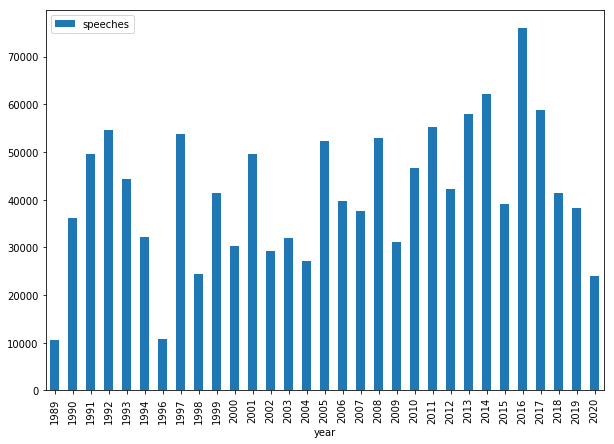

In [56]:
years.plot(kind='bar',x='year',figsize=(10,7))

In [57]:
years.speeches.mean()

41320.22580645161

In [58]:
years.speeches.median()

41338.0

In [59]:
import datetime

In [60]:
vromiko89 = pd.DataFrame(df[df.year=='1989'].sitting_date.value_counts())
vromiko89 = vromiko89.reset_index()
vromiko89 = vromiko89.rename(columns={'sitting_date':'speeches','index':'sitting_dates'})
vromiko89['sitting_dates'] = pd.to_datetime(vromiko89['sitting_dates'])
vromiko89 = vromiko89.sort_values(by='sitting_dates')
vromiko89

sitting_dates  speeches
27    1989-01-09       167
32    1989-01-12       140
14    1989-02-10       285
49    1989-03-07         5
10    1989-03-10       331
46    1989-04-07         7
36    1989-04-09       123
0     1989-04-10       696
41    1989-05-07        50
26    1989-05-09       175
3     1989-05-10       474
43    1989-06-07        33
7     1989-06-09       359
38    1989-06-10        80
6     1989-07-07       360
29    1989-07-09       153
44    1989-07-12        14
19    1989-07-14       249
9     1989-07-17       348
13    1989-07-18       301
15    1989-07-21       266
21    1989-07-27       216
31    1989-08-07       147
25    1989-08-09       175
39    1989-08-12        64
33    1989-09-13       131
24    1989-09-14       177
42    1989-09-15        50
12    1989-09-18       317
35    1989-09-19       125
23    1989-09-20       182
18    1989-09-21       252
17    1989-09-22       258
4     1989-09-25       406
5     1989-09-26       382
2     1989-09-27       490
11    1989-09-28       322
30    1989-09-29       152
1     1989-11-09       554
47    1989-11-20         5
50    1989-11-21         4
45    1989-11-22         8
48    1989-11-29         5
37    1989-11-30       123
20    1989-12-07       248
8     1989-12-09       357
22    1989-12-14       197
40    1989-12-15        57
16    1989-12-18       262
28    1989-12-19       166
34    1989-12-20       128

In [61]:
year96 = pd.DataFrame(df[df.year=='1996'].sitting_date.value_counts())
year96 = year96.reset_index()
year96 = year96.rename(columns={'sitting_date':'speeches','index':'sitting_dates'})
year96['sitting_dates'] = pd.to_datetime(year96['sitting_dates'])
year96 = year96.sort_values(by='sitting_dates')
year96

sitting_dates  speeches
2     1996-01-11       484
34    1996-02-12       147
16    1996-03-12       248
24    1996-04-11       206
1     1996-04-12       560
42    1996-05-11        73
17    1996-05-12       240
20    1996-06-11       223
25    1996-06-12       203
49    1996-07-10         6
19    1996-07-11       223
47    1996-08-10        22
36    1996-08-11       135
48    1996-09-10        18
41    1996-09-12        78
46    1996-10-10        25
0     1996-10-12       681
43    1996-10-16        64
23    1996-10-18       210
37    1996-10-22       124
38    1996-10-23       108
45    1996-10-24        57
8     1996-10-29       313
9     1996-10-30       311
40    1996-10-31        82
39    1996-11-10        84
27    1996-11-11       189
32    1996-11-12       161
3     1996-11-13       468
30    1996-11-14       169
15    1996-11-15       257
29    1996-11-18       171
28    1996-11-19       184
11    1996-11-20       298
18    1996-11-21       228
35    1996-11-22       136
33    1996-11-25       151
10    1996-11-26       305
26    1996-11-27       192
22    1996-11-28       212
14    1996-11-29       269
5     1996-12-10       367
13    1996-12-11       276
4     1996-12-12       460
21    1996-12-13       212
31    1996-12-16       165
44    1996-12-17        58
12    1996-12-18       279
6     1996-12-19       363
7     1996-12-20       329

In [62]:
year96.shape

(50, 2)

#### 8. Member_region

#### Sum up
- Έχουμε τις εκλογικές περιφέρειες προέλευσης, γραμμένες συστηματοποιημένα.
- Υπάρχουν 47861 εγγραφές, που αντιστοιχούν στον όχλο, και άλλες 16.538 εγγραφές, που αντιστοιχούν σε εξωκοινοιβουλευτικούς, για τις οποίες δεν υπάρχει εκλογική περιφέρεια. 
https://www.hellenicparliament.gr/Vouleftes/Diatelesantes-Vouleftes-Apo-Ti-Metapolitefsi-Os-Simera/

In [63]:
df.member_region.value_counts(dropna=False)

β' αθηνων                   205268
α' αθηνων                   123375
β' πειραιως                  95196
NaN                          64399
α' θεσσαλονικης              61915
μαγνησιας                    55479
επικρατειας                  47000
λαρισας                      40465
ξανθης                       34102
αττικης(υπολοιπο)            33679
ηρακλειου                    25013
αιτωλοακαρνανιας             24856
β' θεσσαλονικης              24196
σερρων                       22201
τρικαλων                     21146
καρδιτσας                    20634
χανιων                       20281
ιωαννινων                    20143
α' πειραιως                  20130
δωδεκανησου                  20070
αχαιας                       19934
βοιωτιας                     18076
φθιωτιδας                    17749
αττικης                      16134
ευβοιας                      15900
ηλειας                       15463
λεσβου                       14648
αρκαδιας                     11682
καβαλας             

In [64]:
# df[df.member_region.isnull()]

In [65]:
df[df.member_region.isnull()].roles.value_counts(dropna=False)

NaN                                                                                                         47861
['υπουργος οικονομικων(04/11/1990-08/07/1992)']                                                              1489
['υφυπουργος εργασιας κοινωνικης ασφαλισης και κοινωνικης αλληλεγγυης(23/09/2015-07/09/2019)']                855
['υπουργος δικαιοσυνης(13/04/2000-24/10/2001)']                                                               780
['υφυπουργος περιβαλλοντος χωροταξιας και δημοσιων εργων(03/10/2004-19/09/2007)']                             563
['υπουργος οικονομικων(07/05/2012-06/10/2014)']                                                               496
['υπουργος αγροτικης αναπτυξης και τροφιμων(21/06/2012-06/10/2014)']                                          465
['αναπληρωτης υπουργος οικονομικων(23/09/2015-11/05/2016)']                                                   465
['υπουργος εθνικης οικονομιας(08/08/1991-17/02/1992)']                                  

In [66]:
df[(df.member_region.isnull())&(df.roles.isnull()==False)].count()

member_name              16538
sitting_date             16538
parliamentary_period     16538
parliamentary_session    16538
parliamentary_sitting    16538
political_party          16538
government               16538
member_region                0
roles                    16538
member_gender            16538
speaker_info             16509
speech                   16538
year                     16538
dtype: int64

In [67]:
df[(df.member_region.isnull())&(df.roles.isnull()==False)].political_party.value_counts(dropna=False)

εξωκοινοβουλευτικός    16538
Name: political_party, dtype: int64

In [68]:
df[df.member_region.isnull()].speaker_info.value_counts(dropna=False)

βουλευτης/ες                                                                                      47734
υπουργος οικονομικων                                                                               2343
υφυπουργος εργασιας, κοινωνικης ασφαλισης και κοινωνικης αλληλεγγυης                                898
υπουργος δικαιοσυνης                                                                                801
υφυπουργος οικονομικων                                                                              752
υφυπουργος περιβαλλοντος, χωροταξιας και δημοσιων εργων                                             725
αναπληρωτης υπουργος οικονομικων                                                                    675
υφυπουργος εξωτερικων                                                                               636
υπουργος αγροτικης αναπτυξης και τροφιμων                                                           462
υφυπουργος υγειας                                               

In [69]:
df[(df.member_region.isnull())&((df.speaker_info=='προεδρος')|(df.speaker_info=='προεδρευων'))&(df.member_name.isnull()==False)]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech, year]
Index: []

In [70]:
df[(df.member_region.isnull())&((df.speaker_info=='προεδρος')|(df.speaker_info=='προεδρευων'))&(df.member_name.isnull()==False)].count()

member_name              0
sitting_date             0
parliamentary_period     0
parliamentary_session    0
parliamentary_sitting    0
political_party          0
government               0
member_region            0
roles                    0
member_gender            0
speaker_info             0
speech                   0
year                     0
dtype: int64

#### 9. member_gender

#### Sum up
- Έχουμε φύλο για όλες τις εγγραφές για τις οποίες έχουμε και όνομα. 
- Στη συντριπτική πλειονότητα, οι εγγραφές χωρίς φύλο φαίνεται να ανήκουν στον όχλο. 
- Υπάρχουν οι γνωστές 3 περιπτώσεις προέδρων, για τις οποίες δεν έχουμε φύλο επειδή δεν έχουμε όνομα.

#### Προβλήματα - εκκρεμότητες - απορίες: 
- Υπάρχουν 124 εγγραφές, που έχουν speaker_info "μαρτυς" και NaN values στο roles, οι οποίες δεν έχουν ούτε φύλο. Δεν ξέρω αν έχουμε κάνει καλά εδώ. Βλ. και παρακάτω, στο roles.



In [71]:
df.member_gender.value_counts(dropna=False)

male      1098121
female     134945
NaN         47861
Name: member_gender, dtype: int64

In [72]:
df[df.member_gender.isnull()].speaker_info.value_counts(dropna=False)

βουλευτης/ες    47734
μαρτυς            124
προεδρος            3
Name: speaker_info, dtype: int64

In [73]:
df[df.member_gender.isnull()].roles.value_counts(dropna=False)

NaN    47861
Name: roles, dtype: int64

In [74]:
df[(df.member_gender.isnull())&(df.speaker_info=='προεδρος')]

member_name sitting_date parliamentary_period  \
537850         NaN   31/03/2005            period 11   
537917         NaN   31/03/2005            period 11   
537919         NaN   31/03/2005            period 11   

                            parliamentary_session parliamentary_sitting  \
537850  session 1 continuation of plenary session           sitting 142   
537917  session 1 continuation of plenary session           sitting 142   
537919  session 1 continuation of plenary session           sitting 142   

       political_party                                         government  \
537850             NaN  ['καραμανλη α. κωνσταντινου(10/03/2004-19/09/2...   
537917             NaN  ['καραμανλη α. κωνσταντινου(10/03/2004-19/09/2...   
537919             NaN  ['καραμανλη α. κωνσταντινου(10/03/2004-19/09/2...   

       member_region roles member_gender speaker_info  \
537850           NaN   NaN           NaN     προεδρος   
537917           NaN   NaN           NaN     προεδρος   
537919           NaN   NaN           NaN     προεδρος   

                                                   speech  year  
537850   Το Σώμα συνεφώνησε ομοφώνως. Υπενθυμίζω ότι κ...  2005  
537917   Κυρίες και κύριοι συνάδελφοι, στην επιτροπή σ...  2005  
537919   Το Σώμα συνεφώνησε ομοφώνως. Υπενθυμίζω ότι κ...  2005

In [75]:
df[(df.member_gender.isnull())&(df.speaker_info=='προεδρος')].count()

member_name              0
sitting_date             3
parliamentary_period     3
parliamentary_session    3
parliamentary_sitting    3
political_party          0
government               3
member_region            0
roles                    0
member_gender            0
speaker_info             3
speech                   3
year                     3
dtype: int64

In [76]:
df[(df.member_gender.isnull())&(df.member_name.isnull()==False)]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech, year]
Index: []

In [77]:
df[df.speaker_info=='μαρτυς']

member_name sitting_date parliamentary_period  \
250915                            NaN   12/03/1997             period 9   
250940                            NaN   12/03/1997             period 9   
250943                            NaN   12/03/1997             period 9   
250954                            NaN   12/03/1997             period 9   
250961                            NaN   12/03/1997             period 9   
723335  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723336  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723337  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723338  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723339  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
912516                            NaN   05/07/2013            period 15   
912518                            NaN   05/07/2013            period 15   
912521                            NaN   05/07/2013            period 15   
912523                            NaN   05/07/2013            period 15   
912526                            NaN   05/07/2013            period 15   
912528                            NaN   05/07/2013            period 15   
912530                            NaN   05/07/2013            period 15   
912545                            NaN   05/07/2013            period 15   
912547                            NaN   05/07/2013            period 15   
912549                            NaN   05/07/2013            period 15   
912551                            NaN   05/07/2013            period 15   
912630                            NaN   05/07/2013            period 15   
912631                            NaN   05/07/2013            period 15   
912632                            NaN   05/07/2013            period 15   
912634                            NaN   05/07/2013            period 15   
912636                            NaN   05/07/2013            period 15   
912638                            NaN   05/07/2013            period 15   
912640   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912642                            NaN   05/07/2013            period 15   
912644                            NaN   05/07/2013            period 15   
912646                            NaN   05/07/2013            period 15   
912648                            NaN   05/07/2013            period 15   
912650                            NaN   05/07/2013            period 15   
912652                            NaN   05/07/2013            period 15   
912654                            NaN   05/07/2013            period 15   
912655   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912656                            NaN   05/07/2013            period 15   
912658   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912660   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912662   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912665   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912667   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912670   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912672   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912674                            NaN   05/07/2013            period 15   
912676                            NaN   05/07/2013            period 15   
912678                            NaN   05/07/2013            period 15   
912680                            NaN   05/07/2013            period 15   
912685                            NaN   05/07/2013            period 15   
912687                            NaN   05/07/2013            period 15   
912689                            NaN   05/07/2013            period 15   
912692  βενιζελος βασιλειου ευαγγελος   05/07/2013            period 15   
912694  βενιζελος βασιλειου ευαγγελος   05/07/2013 

#### 10. speaker_info

#### Sum up
Το κρατάμε μόνο για τώρα, για ελέγχους. Θα γίνει drop το column. 

Προηγούμενα σχόλια:
(πρακτικά, ό,τι ήταν μέσα σε παρενθεση δίπλα στο όνομα του ομιλητή, πριν από την εναρξη της ομιλίας του)
- Δεν έχουμε ιδιότητα για περίπου το μισό dataset (45,9%)
- Χρειαζόμαστε data cleaning για συστηματοποίηση της γραφής των ιδιοτήτων και για τυχόν αστοχίες κατά την εξαγωγή της πληροφορίας (π.χ. speaker_info == ν. αρτας)
- Δεν έχουμε "πρωθυπουργός" ως ιδιότητα. Ίσως αυτό χρειάζεται να γίνει δευτερογενώς, σε νέα στήλη

In [78]:
speaker_info = pd.DataFrame(df.speaker_info.value_counts(dropna=False))
speaker_info = speaker_info.reset_index()
speaker_info = speaker_info.rename(columns={'speaker_info':'value_counts',speaker_info.columns[0]:'speaker_info'})
speaker_info.sort_values(by='value_counts',ascending=False)

speaker_info  value_counts
0                                                   NaN        580381
1                                            προεδρευων        381078
2                                              προεδρος         60352
3                                          βουλευτης/ες         47734
4                                υφυπουργος οικονομικων          8140
5                                  υπουργος δικαιοσυνης          6806
6          υφυπουργος εθνικης παιδειας και θρησκευματων          4424
7                                  υπουργος οικονομικων          4376
8                                   υπουργος εσωτερικων          3758
9                                     υπουργος γεωργιας          3726
10                                 υφυπουργος αναπτυξης          3694
11            υπουργος αγροτικης αναπτυξης και τροφιμων          3503
12                                  υφυπουργος γεωργιας          3361
13    υπουργος δικαιοσυνης, διαφανειας και ανθρωπινω...          3296
14                         υπουργος εμπορικης ναυτιλιας          3240
15    υφυπουργος εσωτερικων, δημοσιας διοικησης και ...          3205
16                                υφυπουργος εξωτερικων          3065
17         υφυπουργος υγειας και κοινωνικης αλληλεγγυης          3048
18                                  υπουργος πολιτισμου          3023
19           υπουργος εθνικης παιδειας και θρησκευματων          3013
20                υφυπουργος οικονομιας και οικονομικων          2991
21                              υπουργος δημοσιας ταξης          2914
22                              υπουργος εθνικης αμυνας          2835
23                                   υπουργος αναπτυξης          2805
24                        υφυπουργος εθνικης οικονομιας          2791
25                  υπουργος μεταφορων και επικοινωνιων          2777
26                                υφυπουργος πολιτισμου          2770
27                            ε αντιπροεδρος της βουλης          2744
28    υφυπουργος περιβαλλοντος, χωροταξιας και δημοσ...          2696
29                              προεδρος της κυβερνησης          2631
30                                      υπουργος υγειας          2604
31    υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...          2513
32    υπουργος εσωτερικων, δημοσιας διοικησης και απ...          2502
33                    υπουργος προεδριας της κυβερνησης          2370
34                        προεδρος της νεας δημοκρατιας          2360
35           υπουργος υγειας και κοινωνικης αλληλεγγυης          2342
36                       υφυπουργος υγειας και προνοιας          2326
37                          αναπληρωτης υπουργος υγειας          2303
38    υπουργος περιβαλλοντος, χωροταξιας και δημοσιω...          2301
39     υφυπουργος απασχολησης και κοινωνικης προστασιας          2231
40          υφυπουργος αγροτικης αναπτυξης και τροφιμων          2217
41                            υφυπουργος εθνικης αμυνας          2194
42        υφυπουργος εργασιας και κοινωνικων ασφαλισεων          2082
43    προεδρος του συνασπισμου της αριστερας και της...          1653
44                     αναπληρωτης υπουργος οικονομικων          1567
45                                    υπουργος εργασιας          1567
46          υπουργος παιδειας, ερευνας και θρησκευματων          1566
47             προεδρος του λαικου ορθοδοξου συναγερμου          1489
48                                προεδρος του δη.κ.κι.          1470
49          υπουργος εθνικης οικονομιας και οικονομικων          1374
50                υφυπουργος μεταφορων και επικοινωνιων          1361
51                                υφυπουργος εσωτερικων          1343
52    υπουργος εθνικης αμυνας-προεδρος των ανεξαρτητ...          1314
53                                 υπουργος επικρατειας          1304
54    υφυπουργος εργασιας, κοινωνικης ασφαλισης και ...          1223
55                          υπουργος εθνικης οικονομιας          1185
56             υπουργος υποδομων, μεταφορων και δικτυ

In [79]:
# df[df.speaker_info.isnull()].head(100)

In [80]:
# speaker_info[speaker_info.speaker_info=='πρωθυπουργος']

In [81]:
# speaker_info.sort_values(by='speaker_info',ascending=False)

In [82]:
# round(574778*100/1251349,1)

#### 11. roles

#### Sum up
- 600K είναι λόγοι απλών βουλευτών

#### Προβλήματα - εκκρεμότητες - απορίες
- Μέσα στις 47861, που αποδίδονται στον όχλο (NaN values), είναι 124 που ως speaker_info είχαν "μάρτυς". Δεν θυμάμαι καθόλου γιατί το κάναμε αυτό. Είναι σωστό στρατηγικά; Μήπως πρέπει να κρατήσουμε το "μάρτυς" και για τον ρόλο, ώστε να φαίνεται στο τελικό dataset περί τίνος πρόκειται;
- Όταν έχουμε speaker_info == 'μαρτυς', έχουμε την εξής κατανομή ρόλων:<br>
NaN                                                                                                                                                                                                                                               124<br>
['βουλευτης']                                                                                                                                                                                                                                      31<br>
['υπουργος εξωτερικων(25/06/2013-27/01/2015)', 'αντιπροεδρος της κυβερνησης(25/06/2013-27/01/2015)', 'αντιπροεδρος κυβερνησης(25/06/2013-27/01/2015)', 'αρχηγος κομματος:προεδρος πανελληνιου σοσιαλιστικου κινηματος(18/03/2012-14/06/2015)']     14<br>
Name: roles, dtype: int64

Οι 31+14 τι είναι; Εχουν όντως αυτούς τους ρόλους και ήταν λάθος το 'μαρτυς';

Μάλλον ήταν λάθος το 'μάρτυς', γιατί βλέπω member_name γνωστά ονόματα βουλευτών<br>

NaN                              124<br>
σαχινιδης δημητριου φιλιππος      16<br>
βενιζελος βασιλειου ευαγγελος     14<br>
μπαρκας θεοφανη κωνσταντινος      10<br>
παυλιδης αντωνιου αριστοτελης      5<br>
Name: member_name, dtype: int64

In [83]:
roles = pd.DataFrame(df.roles.value_counts(dropna=False))
roles = roles.reset_index()
roles = roles.rename(columns={'roles':'value_counts',roles.columns[0]:'role'})
roles.sort_values(by='value_counts',ascending=False)

role  value_counts
0                                        ['βουλευτης']        601379
1                                                  NaN         47861
2     ['β αντιπροεδρος βουλης(10/08/1996-19/03/2004)']         26502
3     ['β αντιπροεδρος βουλης(19/03/2004-27/09/2007)']         16477
4     ['α αντιπροεδρος βουλης(22/10/1993-21/04/2000)']         15421
5     ['α αντιπροεδρος βουλης(21/04/2000-19/03/2004)']         15220
6     ['α αντιπροεδρος βουλης(19/03/2004-27/09/2007)']         13436
7     ['γ αντιπροεδρος βουλης(19/03/2004-27/09/2007)']         13312
8         ['θ προεδρος βουλης(10/08/1996-21/04/2000)']         12661
9     ['ε αντιπροεδρος βουλης(22/04/1990-22/10/1993)']         11876
10    ['β αντιπροεδρος βουλης(22/04/1990-22/10/1993)']         11587
11    ['δ αντιπροεδρος βουλης(02/06/2015-18/07/2019)']         10363
12   ['στ αντιπροεδρος βουλης(18/05/2012-02/05/2015)']         10300
13    ['γ αντιπροεδρος βουλης(22/04/1990-22/10/1993)']         10253
14        ['ζ προεδρος βουλης(22/04/1990-22/10/1993)']         10175
15    ['γ αντιπροεδρος βουλης(29/06/2012-02/05/2015)']          9941
16    ['γ αντιπροεδρος βουλης(10/08/1996-21/04/2000)']          9906
17           ['β αντιπροεδρος(10/04/2015-18/07/2019)']          9385
18    ['ε αντιπροεδρος βουλης(27/09/2007-17/05/2012)']          9309
19    ['ε αντιπροεδρος βουλης(10/04/2015-18/07/2019)']          8763
20    ['α αντιπροεδρος βουλης(15/10/2009-17/05/2012)']          8691
21           ['γ αντιπροεδρος(10/04/2015-18/07/2019)']          8293
22    ['α αντιπροεδρος βουλης(27/09/2007-14/10/2009)']          8178
23    ['δ αντιπροεδρος βουλης(22/04/1990-22/10/1993)']          8082
24        ['ι προεδρος βουλης(21/04/2000-19/03/2004)']          7963
25    ['γ αντιπροεδρος βουλης(15/10/2009-17/05/2012)']          7662
26    ['γ αντιπροεδρος βουλης(21/04/2000-19/03/2004)']          7310
27    ['α αντιπροεδρος βουλης(10/04/2015-18/07/2019)']          7092
28    ['δ αντιπροεδρος βουλης(29/06/2012-02/06/2015)']          7074
29    ['γ αντιπροεδρος βουλης(27/09/2007-14/10/2009)']          6703
30       ['ια προεδρος βουλης(19/03/2004-27/09/2007)']          6696
31    ['δ αντιπροεδρος βουλης(15/10/2009-17/05/2012)']          6676
32           ['β αντιπροεδρος(29/03/2013-02/05/2015)']          6206
33   ['στ αντιπροεδρος(10/04/2015-17/07/2019)', 'στ...          6181
34    ['ζ αντιπροεδρος βουλης(07/06/2016-02/08/2019)']          5952
35    ['δ αντιπροεδρος βουλης(21/04/2000-19/03/2004)']          5781
36           ['ε αντιπροεδρος(07/09/2013-02/05/2015)']          5688
37    ['β αντιπροεδρος βουλης(15/10/2009-17/05/2012)']          5589
38       ['ιζ προεδρος βουλης(10/04/2015-18/07/2019)']          5244
39   ['στ αντιπροεδρος βουλης(15/10/2009-17/05/2012)']          4901
40    ['β αντιπροεδρος βουλης(27/09/2007-14/10/2009)']          4794
41    ['α αντιπροεδρος βουλης(29/06/2012-02/06/2015)']          4678
42       ['ιγ προεδρος βουλης(15/10/2009-18/05/2012)']          4543
43        ['η προεδρος βουλης(22/10/1993-10/08/1996)']          4372
44    ['δ αντιπροεδρος βουλης(19/03/2004-14/10/2009)']          3926
45    ['ζ αντιπροεδρος βουλης(17/06/2010-17/05/2012)']          3571
46       ['ιβ προεδρος βουλης(27/09/2007-15/10/2009)']          3474
47    ['ε αντιπροεδρος βουλης(18/05/2012-24/06/2013)']          3454
48    ['γ αντιπροεδρος βουλης(22/10/1993-10/08/1996)']          3442
49    ['ζ αντιπροεδρος βουλης(18/07/2019-28/07/2020)']          2736
50    ['β αντιπροεδρος βουλης(18/05/2012-28/03/2013)']          2691
51    ['β αντιπροεδρος βουλης(18/07/2019-28/07/2020)']          2548
52    ['γ αντιπροεδρος βουλης(18/07/2019-28/07/2020)']          2471
53   ['ζ αντιπροεδρος βουλης(02/05/2015-07/06/2016)...          2446
54    ['α αντιπροεδρος βουλης(18/07/2019-28/07/2020)']          2333
55    ['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)']          2130
56    ['η αντιπροεδρος βουλης(18/07/2019-28/07/2020)']          2076
57   ['αναπληρωτης υπουργος υγειας(23/09/2015-07

In [84]:
df[df.roles.isnull()].head(100)

member_name sitting_date parliamentary_period parliamentary_session  \
3            NaN   03/07/1989             period 5             session 1   
10           NaN   04/07/1989             period 5             session 1   
19           NaN   05/07/1989             period 5             session 1   
59           NaN   05/07/1989             period 5             session 1   
61           NaN   05/07/1989             period 5             session 1   
94           NaN   06/07/1989             period 5             session 1   
102          NaN   07/07/1989             period 5             session 1   
158          NaN   07/07/1989             period 5             session 1   
186          NaN   07/07/1989             period 5             session 1   
204          NaN   07/07/1989             period 5             session 1   
208          NaN   07/07/1989             period 5             session 1   
250          NaN   07/07/1989             period 5             session 1   
275          NaN   07/07/1989             period 5             session 1   
320          NaN   07/07/1989             period 5             session 1   
327          NaN   07/07/1989             period 5             session 1   
440          NaN   07/07/1989             period 5             session 1   
454          NaN   07/07/1989             period 5             session 1   
563          NaN   08/07/1989             period 5             session 1   
565          NaN   08/07/1989             period 5             session 1   
589          NaN   08/07/1989             period 5             session 1   
599          NaN   08/07/1989             period 5             session 1   
601          NaN   08/07/1989             period 5             session 1   
604          NaN   12/07/1989             period 5             session 1   
606          NaN   12/07/1989             period 5             session 1   
610          NaN   12/07/1989             period 5             session 1   
688          NaN   12/07/1989             period 5             session 1   
700          NaN   12/07/1989             period 5             session 1   
744          NaN   12/07/1989             period 5             session 1   
798          NaN   12/07/1989             period 5             session 1   
845          NaN   12/07/1989             period 5             session 1   
847          NaN   12/07/1989             period 5             session 1   
849          NaN   12/07/1989             period 5             session 1   
852          NaN   14/07/1989             period 5             session 1   
855          NaN   14/07/1989             period 5             session 1   
860          NaN   14/07/1989             period 5             session 1   
874          NaN   14/07/1989             period 5             session 1   
917          NaN   14/07/1989             period 5             session 1   
1002         NaN   14/07/1989             period 5             session 1   
1080         NaN   14/07/1989             period 5             session 1   
1082         NaN   14/07/1989             period 5             session 1   
1096         NaN   14/07/1989             period 5             session 1   
1098         NaN   14/07/1989             period 5             session 1   
1112         NaN   17/07/1989             period 5             session 1   
1214         NaN   17/07/1989             period 5             session 1   
1248         NaN   17/07/1989             period 5             session 1   
1254         NaN   17/07/1989             period 5             session 1   
1303         NaN   17/07/1989             period 5             session 1   
1443         NaN   17/07/1989             period 5             session 1   
1445         NaN   17/07/1989             period 5             session 1   
1452         NaN   18/07/1989             period 5             session 1   
1513         NaN   18/07/1989             period 5             session 1   
1517         NaN   18/07/1989             period 5   

In [85]:
df.groupby('roles').speaker_info.value_counts()

roles                                                                                                                                                                                                                                                     speaker_info                                                                                                                                                                    
['α αντιπροεδρος βουλης(07/04/1989-21/11/1989)']                                                                                                                                                                                                          προεδρευων                                                                                                                                                                            466
                                                                                                                                         

In [86]:
df[(df.speaker_info.isnull()==False)&(len(df.roles)==2)]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech, year]
Index: []

In [87]:
df[(df.speaker_info.isnull()==False)&(df.roles=='[]')].count()

member_name              0
sitting_date             0
parliamentary_period     0
parliamentary_session    0
parliamentary_sitting    0
political_party          0
government               0
member_region            0
roles                    0
member_gender            0
speaker_info             0
speech                   0
year                     0
dtype: int64

In [88]:
df[df.roles.isnull()].count()

member_name                  0
sitting_date             47861
parliamentary_period     47861
parliamentary_session    47861
parliamentary_sitting    47861
political_party          47734
government               47861
member_region                0
roles                        0
member_gender                0
speaker_info             47861
speech                   47861
year                     47861
dtype: int64

In [89]:
df[df.roles.str.contains('πρωθυπουργος',na=False)].count()

member_name              2807
sitting_date             2807
parliamentary_period     2807
parliamentary_session    2807
parliamentary_sitting    2807
political_party          2807
government               2807
member_region            2782
roles                    2807
member_gender            2807
speaker_info             2807
speech                   2807
year                     2807
dtype: int64

In [90]:
df[df.roles.str.contains('πρωθυπουργος',na=False)].groupby('year').member_name.value_counts(dropna=False)

year  member_name                       
1989  τζαννετακης πετρου τζαννης             33
      ξενοφων ζολωτας                         5
1990  μητσοτακης κυριακου κωνσταντινος      137
      ξενοφων ζολωτας                         1
1991  μητσοτακης κυριακου κωνσταντινος      260
1992  μητσοτακης κυριακου κωνσταντινος      296
1993  μητσοτακης κυριακου κωνσταντινος      230
1994  παπανδρεου γεωργιου ανδρεας             4
2004  καραμανλης αλεξανδρου κωνσταντινος      5
2005  καραμανλης αλεξανδρου κωνσταντινος     60
2006  καραμανλης αλεξανδρου κωνσταντινος     48
2007  καραμανλης αλεξανδρου κωνσταντινος     77
2008  καραμανλης αλεξανδρου κωνσταντινος    120
2009  καραμανλης αλεξανδρου κωνσταντινος     32
      παπανδρεου ανδρεα γεωργιος             15
2010  παπανδρεου ανδρεα γεωργιος            108
2011  παπανδρεου ανδρεα γεωργιος            106
      λουκας παπαδημος                        9
2012  λουκας παπαδημος                       10
      σαμαρας κωνσταντινου αντωνιος           2

In [91]:
df.columns

Index(['member_name', 'sitting_date', 'parliamentary_period',
       'parliamentary_session', 'parliamentary_sitting', 'political_party',
       'government', 'member_region', 'roles', 'member_gender', 'speaker_info',
       'speech', 'year'],
      dtype='object')

In [92]:
df[(df.roles==float('NaN'))&(df.speaker_info=='μαρτυς')]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech, year]
Index: []

In [93]:
df[(df.roles=='βουλευτης/ες')&(df.speaker_info=='μαρτυς')]

Empty DataFrame
Columns: [member_name, sitting_date, parliamentary_period, parliamentary_session, parliamentary_sitting, political_party, government, member_region, roles, member_gender, speaker_info, speech, year]
Index: []

In [94]:
df[df.speaker_info=='μαρτυς'].roles.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                               124
['βουλευτης']                                                                                                                                                                                                                                      31
['υπουργος εξωτερικων(25/06/2013-27/01/2015)', 'αντιπροεδρος της κυβερνησης(25/06/2013-27/01/2015)', 'αντιπροεδρος κυβερνησης(25/06/2013-27/01/2015)', 'αρχηγος κομματος:προεδρος πανελληνιου σοσιαλιστικου κινηματος(18/03/2012-14/06/2015)']     14
Name: roles, dtype: int64

In [95]:
df.columns

Index(['member_name', 'sitting_date', 'parliamentary_period',
       'parliamentary_session', 'parliamentary_sitting', 'political_party',
       'government', 'member_region', 'roles', 'member_gender', 'speaker_info',
       'speech', 'year'],
      dtype='object')

In [96]:
df[(df.speaker_info=='μαρτυς')&(df.roles!=float('NaN'))].member_gender.value_counts(dropna=False)

NaN     124
male     45
Name: member_gender, dtype: int64

In [97]:
df[(df.speaker_info=='μαρτυς')&(df.roles!=float('NaN'))]

member_name sitting_date parliamentary_period  \
250915                            NaN   12/03/1997             period 9   
250940                            NaN   12/03/1997             period 9   
250943                            NaN   12/03/1997             period 9   
250954                            NaN   12/03/1997             period 9   
250961                            NaN   12/03/1997             period 9   
723335  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723336  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723337  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723338  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
723339  παυλιδης αντωνιου αριστοτελης   29/04/2009   period 12 review 8   
912516                            NaN   05/07/2013            period 15   
912518                            NaN   05/07/2013            period 15   
912521                            NaN   05/07/2013            period 15   
912523                            NaN   05/07/2013            period 15   
912526                            NaN   05/07/2013            period 15   
912528                            NaN   05/07/2013            period 15   
912530                            NaN   05/07/2013            period 15   
912545                            NaN   05/07/2013            period 15   
912547                            NaN   05/07/2013            period 15   
912549                            NaN   05/07/2013            period 15   
912551                            NaN   05/07/2013            period 15   
912630                            NaN   05/07/2013            period 15   
912631                            NaN   05/07/2013            period 15   
912632                            NaN   05/07/2013            period 15   
912634                            NaN   05/07/2013            period 15   
912636                            NaN   05/07/2013            period 15   
912638                            NaN   05/07/2013            period 15   
912640   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912642                            NaN   05/07/2013            period 15   
912644                            NaN   05/07/2013            period 15   
912646                            NaN   05/07/2013            period 15   
912648                            NaN   05/07/2013            period 15   
912650                            NaN   05/07/2013            period 15   
912652                            NaN   05/07/2013            period 15   
912654                            NaN   05/07/2013            period 15   
912655   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912656                            NaN   05/07/2013            period 15   
912658   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912660   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912662   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912665   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912667   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912670   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912672   μπαρκας θεοφανη κωνσταντινος   05/07/2013            period 15   
912674                            NaN   05/07/2013            period 15   
912676                            NaN   05/07/2013            period 15   
912678                            NaN   05/07/2013            period 15   
912680                            NaN   05/07/2013            period 15   
912685                            NaN   05/07/2013            period 15   
912687                            NaN   05/07/2013            period 15   
912689                            NaN   05/07/2013            period 15   
912692  βενιζελος βασιλειου ευαγγελος   05/07/2013            period 15   
912694  βενιζελος βασιλειου ευαγγελος   05/07/2013 

In [98]:
df[(df.speaker_info=='μαρτυς')&(df.roles!=float('NaN'))].member_name.value_counts(dropna=False)

NaN                              124
σαχινιδης δημητριου φιλιππος      16
βενιζελος βασιλειου ευαγγελος     14
μπαρκας θεοφανη κωνσταντινος      10
παυλιδης αντωνιου αριστοτελης      5
Name: member_name, dtype: int64

#### 11.speech

#### Προβλήματα - εκκρεμότητες - απορίες
- Σε 9 εγγραφές μάς λείπει η ομιλία: Πώς γίνεται αυτό; Και πώς βρήκαμε όλα τα υπόλοιπα στοιχεία, αφού δεν είχαμε τις ομιλίες;

In [99]:
df[df.speech.isnull()]

member_name sitting_date  \
74480                σουρλας ιωαννη γεωργιος   20/08/1991   
116114               σουρλας ιωαννη γεωργιος   18/05/1992   
131036               σουρλας ιωαννη γεωργιος   25/08/1992   
146053            μελιδης αναστασιου ιωαννης   30/11/1992   
186565         γικονογλου χαραλαμπους μοσχος   06/09/1993   
428756  κεφαλογιαννης κωνσταντινου εμμανουηλ   02/11/2001   
662350       πετραλια-παλλη επαμεινωνδα φανη   15/02/2008   
803770              αργυρης ιωαννη ευαγγελος   14/04/2011   
959157         βαρβιτσιωτης ιωαννη μιλτιαδης   01/04/2014   

       parliamentary_period               parliamentary_session  \
74480              period 7  continuation of summer recess 1991   
116114             period 7                           session 2   
131036             period 7  continuation of summer recess 1992   
146053             period 7                           session 3   
186565             period 7                         summer 1993   
428756   period 10 review 7                           session 2   
662350   period 12 review 8                           session 1   
803770            period 13                           session 2   
959157            period 15                           session 2   

       parliamentary_sitting                 political_party  \
74480             sitting 11                  νεα δημοκρατια   
116114           sitting 129                  νεα δημοκρατια   
131036            sitting 10                  νεα δημοκρατια   
146053            sitting 36  πανελληνιο σοσιαλιστικο κινημα   
186565            sitting 44  πανελληνιο σοσιαλιστικο κινημα   
428756            sitting 23                  νεα δημοκρατια   
662350            sitting 87                  νεα δημοκρατια   
803770           sitting 121  πανελληνιο σοσιαλιστικο κινημα   
959157           sitting 118                  νεα δημοκρατια   

                                               government member_region  \
74480   ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']     μαγνησιας   
116114  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']     μαγνησιας   
131036  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']     μαγνησιας   
146053  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']     αργολιδος   
186565  ['μητσοτακη κωνσταντινου(11/04/1990-13/10/1993)']       ημαθιας   
428756     ['σημιτη κωνσταντινου(13/04/2000-10/03/2004)']     ηρακλειου   
662350  ['καραμανλη α. κωνσταντινου(19/09/2007-07/10/2...     β' αθηνων   
803770  ['παπανδρεου α. γεωργιου(06/10/2009-11/11/2011)']     ιωαννινων   
959157      ['σαμαρα κ. αντωνιου(21/06/2012-26/01/2015)']     β' αθηνων   

                                                    roles member_gender  \
74480   ['υπουργος υγειας προνοιας και κοινωνικων ασφα...          male   
116114                                      ['βουλευτης']          male   
131036                                      ['βουλευτης']          male   
146053                                      ['βουλευτης']          male   
186565                                      ['βουλευτης']          male   
428756                                      ['βουλευτης']          male   
662350  ['υπουργος απασχολησης και κοινωνικης προστασι...        female   
803770   ['γ αντιπροεδρος βουλης(15/10/2009-17/05/2012)']          male   
959157  ['υπουργος ναυτιλιας και αιγαιου(25/06/2013-27...          male   

                                             speaker_info speech  year  
74480   υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...    NaN  1991  
116114  υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...    NaN  1992  
131036  υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...    NaN  1992  
146053                                                NaN    NaN  1992  
186565                                                NaN    NaN  1993  
428756                                                NaN    NaN  2001  
662350     υπουργος απασχολησης και κοινωνικης προστασιας    NaN  2008  
803770                  

#### Overall

#### Προβλήματα - εκκρεμότητες - απορίες
- Εδώ, το προηγούμενο σχόλιο, το οποίο δεν καταλαβαίνω καν αυτή τη στιγμή... "Αφαιρώντας τις εγγραφές που αποδίδονται στον όχλο, το 51,6% των λοιπών εγγραφών είναι πλήρεις, χωρίς missing values σε κανένα variable" (Το αφήνω, όμως, μήπως μου 'ρθει. 
- Όταν κάποιος έχει απλή βουλευτική ιδιότητα, δεν γίνεται αναφορά στην έναρξη και στη λήξη της θητείας/ιδιότητάς του. Το χρειαζόμαστε, όμως, στην πραγματικότητα;

- <b> ΤΟ ΒΑΣΙΚΟ ΕΙΝΑΙ ΤΟ ΕΞΗΣ <b>: 

        Υπάρχει περίπτωση να χάνουμε ομιλίες; Δηλαδή, να μην έχουμε συλλέξει όλες τις ομιλίες που υπάρχουν στην πηγή, δηλαδή το parliament.gr; Εάν ναι, πρέπει να το πούμε. Και, αν τυχόν υπάρχει κάτι που έχουμε κάνει ή δεν έχουμε κάνει στον κώδικα, ή αν τυχόν υπάρχει κάτι που έχουμε διαπιστώσει στο site, κάποιος περιορισμός ή κάποιο πρόβλημα, εξαιτίας του οποίου ξέρουμε ή θεωρούμε ότι δεν συγκεντρώσαμε όλες τις ομιλίες, πρέπει να το αναφέρουμε στο κείμενο ρητά. Είναι σοβαρό αυτό, γιατί από τα data που θα δώσουμε μπορεί, για κάποιους, να προκύψουν επηρεαζόμενες αναλύσεις. 

In [100]:
df1 = df[~((df.member_name.isnull())&(df.roles.isnull()))]
df1.shape

(1233066, 13)

In [101]:
df1 = df1.dropna()
df1.shape

(636170, 13)

In [102]:
df.shape

(1280927, 13)

In [103]:
round(636170*100/1233066,1)

51.6

In [104]:
member = pd.DataFrame(df[df.roles=="['βουλευτης']"])
member.shape
# member.official_roles.value_counts()

(601379, 13)

In [105]:
df.member_name.value_counts()

κακλαμανης χρηστου αποστολος                           36115
σγουριδης σγουρη παναγιωτης                            31801
σουρλας ιωαννη γεωργιος                                28457
κρητικος νικολαου παναγιωτης                           24528
γειτονας ιωαννη κωνσταντινος                           18926
τραγακης παναγιωτη ιωαννης                             18779
κακλαμανης μιχαηλ νικητας                              16216
χατζηγακης μιχαηλ σωτηριος                             15477
μπενακη-ψαρουδα ευαγγελου αννα                         14529
δρεττακης γεωργιου εμμανουηλ                           12221
τσαλδαρης κωνσταντινου αθανασιος                       12100
μαρκογιαννακης εμμανουηλ χρηστος                       11654
κουρακης στυλιανου αναστασιος (τασος)                  11309
λαμπρουλης αριστειδη γεωργιος                          11130
πολυδωρας γεωργιου βυρων                               11048
κολλια-τσαρουχα ευστρατιου μαρια                       10632
αποστολιδης θωμα λουκας 

In [111]:
df[df.roles=="['βουλευτης']"].member_name.value_counts()

κακλαμανης χρηστου αποστολος                           10826
λαφαζανης γεωργιου παναγιωτης                           9254
λοβερδος νικολαου ανδρεας                               7055
κορακας χρηστου ευστρατιος                              6835
κωνσταντοπουλου ν. ζωη                                  6048
ροντουλης γεωργιου αστεριος                             5870
παυλοπουλος βασιλειου προκοπιος                         5866
γκατζης φιλιππου νικολαος                               5489
κεδικογλου συμεων βασιλειος                             5444
γεωργιαδης νικολαου μαριος                              5369
βοριδης χρηστου μαυρουδης (μακης)                       5081
σκυλλακος ηλια αντωνιος                                 4727
γεννηματας θεοδωρου γεωργιος                            4655
καραθανασοπουλος πετρου νικολαος                        4389
γεωργιαδης αθανασιου σπυριδων-αδωνις                    4331
τζεκης κωνσταντινου αγγελος                             4219
παφιλης σπυριδωνος αθανα

In [119]:
df.to_csv('tell_all_corrected_v2.csv',index=False)